## Juan Carlos Ruiz Montaño

In [63]:
from skimage import io, color, filters #procesamiento de imagenes
import matplotlib.pyplot as plt #visualizacion de datos


[[[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]

 [[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]

 [[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]

 ...

 [[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]

 [[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]

 [[ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]
  ...
  [ 71 112  76   0]
  [ 71 112  76   0]
  [ 71 112  76   0]]]
(400, 400, 4)


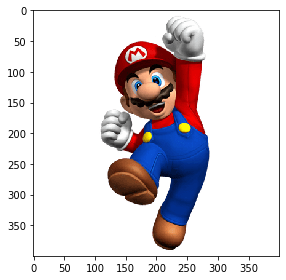

In [21]:
img = io.imread("img/mario.jpg")
io.imshow(img) #muestra la imagen
print(img) #imprime matriz de colores
print (img.shape) # escala de colores

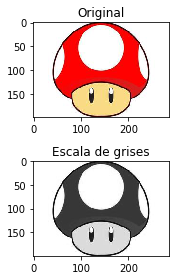

(200, 286, 3)


In [20]:

hongo = io.imread("img/hongo.jpg")
n = color.rgb2gray(hongo) #pasando a gris
plt.subplot(211)
plt.title('Original')
io.imshow(hongo)
plt.subplot(212)
plt.title('Escala de grises')
io.imshow(n)
io.show()
print(hongo.shape)

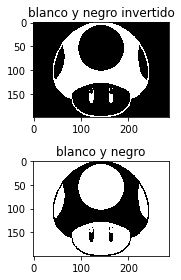

In [44]:
#Transformacion blanco y negro puro
white_black = color.rgb2gray(hongo)
rows, cols = white_black.shape

for i in range(rows):
	for j in range(cols):
		if(white_black[i,j] <= 0.5):
			white_black[i,j] = 0
		else:
			white_black[i,j] = 1

#Transformacion blanco y negro puro invertido
black_white = color.rgb2gray(hongo)
rowss, colss = black_white.shape

for a in range(rows):
	for b in range(cols):
		if(black_white[a,b] <= 0.5):
			black_white[a,b] = 1
		else:
			black_white[a,b] = 0


plt.subplot(212)
plt.title('blanco y negro')
io.imshow(white_black)
plt.subplot(211)
plt.title('blanco y negro invertido')
io.imshow(black_white)
io.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


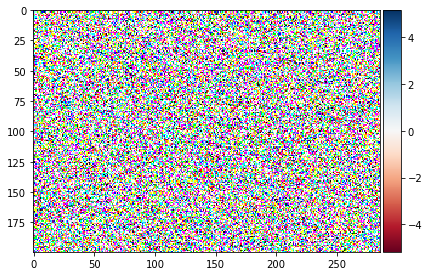

In [45]:
import numpy as np
mean = 0.9999999999999
var = 0.01

noise = np.random.normal(mean, var**0.0001, hongo.shape)
noisy = hongo + noise
noisy = np.clip(noisy,0.0,1.0)
io.imshow(noise)

C:\Users\juank\.conda\envs\IA\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


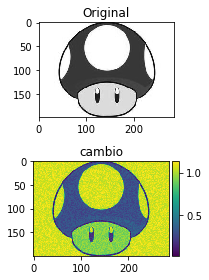

In [54]:
#La imagen debe esta en escala de grises
noisy = n + 0.4*n.std()*np.random.random(n.shape)
plt.subplot(211)
plt.title('Original')
io.imshow(n)
plt.subplot(212)
plt.title('cambio')
io.imshow(noisy)
io.show()

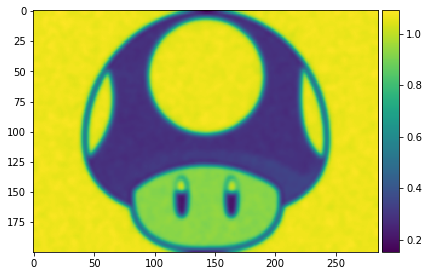

In [55]:
#REDUCIENDO RUIDO
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
io.imshow(gauss_denoised)

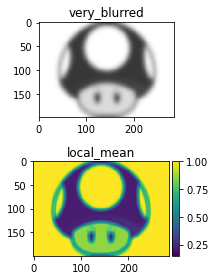

In [61]:
blurred_img = ndimage.gaussian_filter(n, sigma=3)
very_blurred = ndimage.gaussian_filter(n, sigma=5)
local_mean = ndimage.uniform_filter(n, size=11)
plt.subplot(221)
plt.title('blurred_img')
io.imshow(blurred_img)
plt.title('very_blurred')
io.imshow(very_blurred)
plt.subplot(223)
plt.title('local_mean')
io.imshow(local_mean)
io.show()

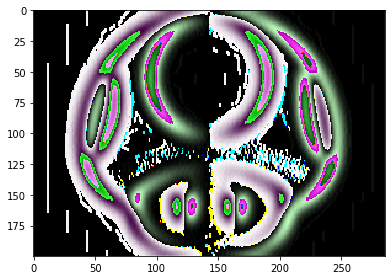

In [70]:
im = ndimage.gaussian_filter(hongo, 5)
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
io.imshow(sy)

Text(0.5, 1.0, 'prewitt Edge Detection')

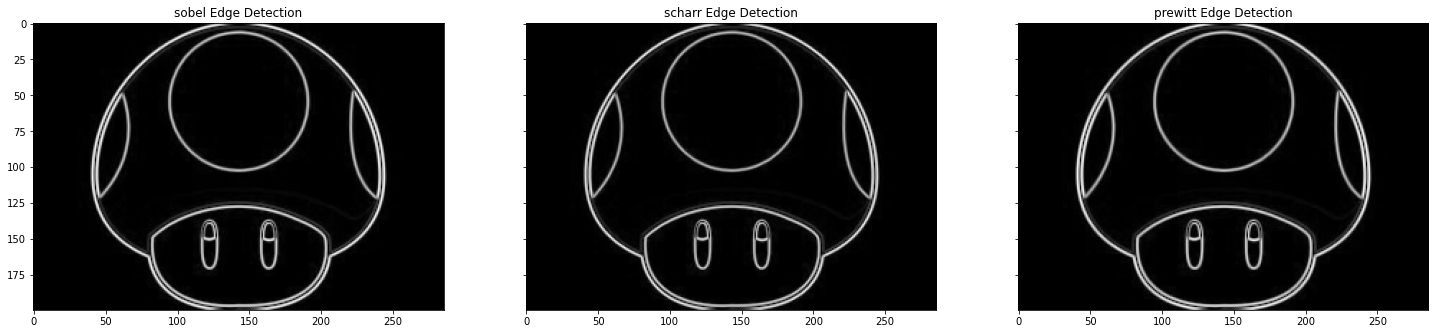

In [64]:
filtros = [filters.sobel, filters.roberts, filters.prewitt]
edge_sobel = filters.sobel(n)
edge_scharr = filters.scharr(n)
edge_prewitt = filters.prewitt(n)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                        figsize=(25, 10))

axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
axes[0].set_title('sobel Edge Detection')

axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('scharr Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('prewitt Edge Detection')

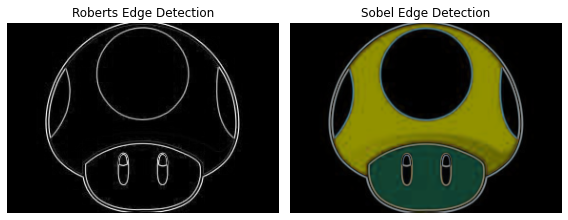

In [65]:
edge_roberts = filters.roberts(n)
edge_sobel = filters.sobel(hongo)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                        figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
   ax.axis('off')

plt.tight_layout()
plt.show()

Python cuenta con variedad de librerias que facilitan el procesamiento de imagenes con diferentes metodos como lo es la saturacion, cambios de filtros, reducir el ruido , mejorar calidad.